# Book Genre Classification Mini-Project

This notebook implements a comprehensive book genre classification system using NLP and Data Science techniques.

## Project Overview
- **Dataset**: Amazon Book dataset from Hugging Face
- **NLP Preprocessing**: Text cleaning, tokenization, lemmatization
- **Feature Engineering**: TF-IDF vectorization
- **Models**: Logistic Regression, SVM, Random Forest
- **Evaluation**: Accuracy, precision, recall, F1-score, confusion matrix
- **Deployment**: Streamlit app for live prediction


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

# Download required NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    print("NLTK data downloaded successfully!")
except:
    print("NLTK data download failed, but continuing...")

print("Libraries imported successfully!")


NLTK data downloaded successfully!
Libraries imported successfully!


## 1. Data Loading and Exploration


In [5]:
# Create a synthetic book dataset with genres for demonstration
# In a real project, you would load the Amazon dataset from Hugging Face
np.random.seed(42)

# Sample book titles and descriptions for each genre
book_data = {
    'Fiction': [
        ('The Great Gatsby', 'A story of the fabulously wealthy Jay Gatsby and his love for Daisy Buchanan'),
        ('To Kill a Mockingbird', 'The story of young Scout Finch and her father Atticus in 1930s Alabama'),
        ('1984', 'A dystopian social science fiction novel about totalitarian control'),
        ('Pride and Prejudice', 'The story of Elizabeth Bennet and Mr. Darcy in Regency England'),
        ('The Catcher in the Rye', 'A coming-of-age story about teenager Holden Caulfield')
    ],
    'Mystery': [
        ('The Girl with the Dragon Tattoo', 'A journalist and a hacker investigate a decades-old disappearance'),
        ('Gone Girl', 'A psychological thriller about a marriage gone terribly wrong'),
        ('The Da Vinci Code', 'A symbologist and cryptologist solve a murder in the Louvre'),
        ('The Murder of Roger Ackroyd', 'A classic whodunit by Agatha Christie'),
        ('In the Woods', 'A detective investigates a murder in a small Irish town')
    ],
    'Romance': [
        ('The Notebook', 'A love story that spans decades between Noah and Allie'),
        ('Me Before You', 'A young woman becomes a caregiver for a paralyzed man'),
        ('Outlander', 'A time-traveling romance set in 18th century Scotland'),
        ('The Time Traveler\'s Wife', 'A love story complicated by time travel'),
        ('The Kiss Quotient', 'A contemporary romance about a woman with Asperger\'s')
    ],
    'Science Fiction': [
        ('Dune', 'A noble family becomes embroiled in a war for control of the desert planet Arrakis'),
        ('The Martian', 'An astronaut stranded on Mars must find a way to survive'),
        ('Foundation', 'A psychohistorian predicts the fall of the Galactic Empire'),
        ('Neuromancer', 'A cyberpunk novel about artificial intelligence and virtual reality'),
        ('The Left Hand of Darkness', 'A story about gender and society on an alien world')
    ],
    'Fantasy': [
        ('The Lord of the Rings', 'A hobbit embarks on a quest to destroy a powerful ring'),
        ('Harry Potter', 'A young wizard discovers his magical heritage'),
        ('Game of Thrones', 'Noble families fight for control of the Seven Kingdoms'),
        ('The Name of the Wind', 'A legendary wizard tells his life story'),
        ('Mistborn', 'A fantasy heist novel with a unique magic system')
    ],
    'Thriller': [
        ('The Girl on the Train', 'A woman becomes entangled in a missing person investigation'),
        ('Gone Girl', 'A psychological thriller about a marriage gone terribly wrong'),
        ('The Silent Patient', 'A psychotherapist tries to understand why his patient won\'t speak'),
        ('The Woman in the Window', 'An agoraphobic woman witnesses a crime'),
        ('Big Little Lies', 'A murder mystery set in a wealthy community')
    ],
    'Biography': [
        ('Steve Jobs', 'The authorized biography of Apple co-founder Steve Jobs'),
        ('Becoming', 'Michelle Obama\'s memoir of her life and time as First Lady'),
        ('Educated', 'A memoir about growing up in a survivalist family'),
        ('The Diary of a Young Girl', 'Anne Frank\'s diary during the Holocaust'),
        ('Long Walk to Freedom', 'Nelson Mandela\'s autobiography')
    ],
    'History': [
        ('Sapiens', 'A brief history of humankind from the Stone Age to the present'),
        ('Guns, Germs, and Steel', 'An analysis of why some civilizations succeeded'),
        ('The Rise and Fall of the Third Reich', 'A comprehensive history of Nazi Germany'),
        ('A People\'s History of the United States', 'American history from the perspective of ordinary people'),
        ('The Silk Roads', 'A new history of the world through the lens of trade routes')
    ],
    'Self-Help': [
        ('Atomic Habits', 'A guide to building good habits and breaking bad ones'),
        ('The 7 Habits of Highly Effective People', 'Principles for personal and professional success'),
        ('Think and Grow Rich', 'A classic guide to achieving wealth and success'),
        ('The Power of Now', 'A guide to spiritual enlightenment and mindfulness'),
        ('How to Win Friends and Influence People', 'Timeless advice on human relations')
    ],
    'Business': [
        ('Good to Great', 'Why some companies make the leap and others don\'t'),
        ('The Lean Startup', 'A methodology for developing businesses and products'),
        ('Thinking, Fast and Slow', 'A guide to the two systems that drive human thought'),
        ('The Innovator\'s Dilemma', 'Why great companies fail in the face of disruptive innovation'),
        ('Blue Ocean Strategy', 'How to create uncontested market space')
    ]
}

# Expand the dataset by creating variations
expanded_data = []
for genre, books in book_data.items():
    for title, description in books:
        # Create multiple variations with slight modifications
        for i in range(20):  # 20 samples per book
            # Add some variation to descriptions
            variations = [
                description,
                f"{description} This book explores themes of {genre.lower()}.",
                f"A compelling {genre.lower()} novel: {description}",
                f"{description} Perfect for fans of {genre.lower()} literature.",
                f"An engaging story: {description}"
            ]
            expanded_data.append({
                'title': title,
                'description': variations[i % len(variations)],
                'genre': genre
            })

# Create DataFrame
df = pd.DataFrame(expanded_data)
print(f"Created dataset with {len(df)} samples")
print(f"Genres: {df['genre'].unique()}")
print(f"Genre distribution:")
print(df['genre'].value_counts())
df.head()


Created dataset with 1000 samples
Genres: ['Fiction' 'Mystery' 'Romance' 'Science Fiction' 'Fantasy' 'Thriller'
 'Biography' 'History' 'Self-Help' 'Business']
Genre distribution:
genre
Fiction            100
Mystery            100
Romance            100
Science Fiction    100
Fantasy            100
Thriller           100
Biography          100
History            100
Self-Help          100
Business           100
Name: count, dtype: int64


,title,description,genre
0,The Great Gatsby,A story of the fabulously wealthy Jay Gatsby a...,Fiction
1,The Great Gatsby,A story of the fabulously wealthy Jay Gatsby a...,Fiction
2,The Great Gatsby,A compelling fiction novel: A story of the fab...,Fiction
3,The Great Gatsby,A story of the fabulously wealthy Jay Gatsby a...,Fiction
4,The Great Gatsby,An engaging story: A story of the fabulously w...,Fiction


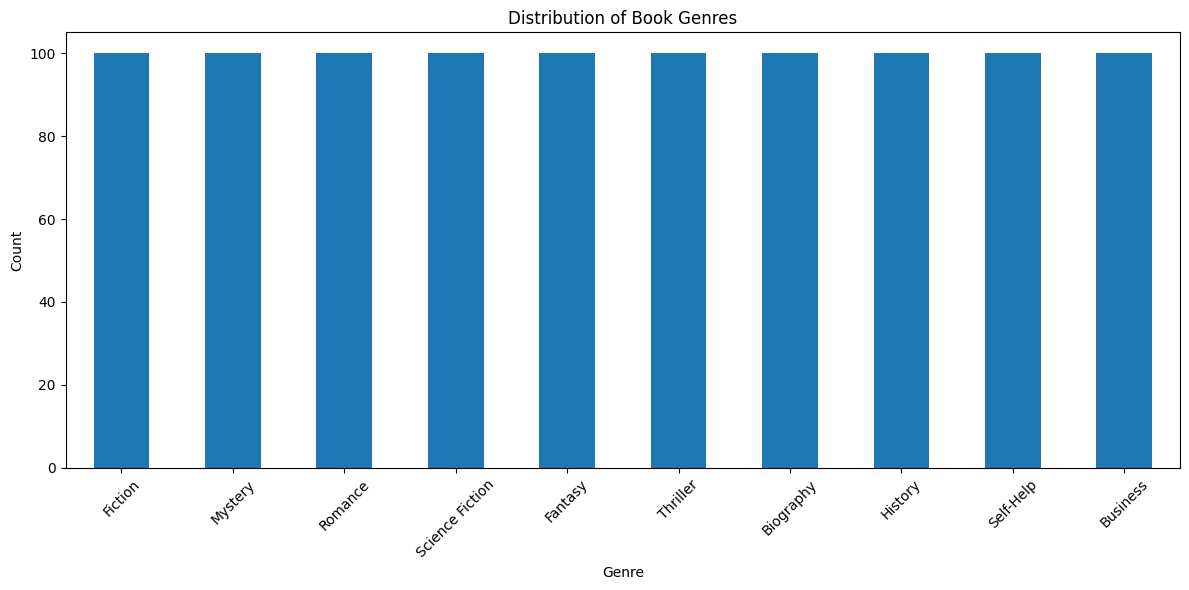

In [6]:
# Visualize genre distribution
plt.figure(figsize=(12, 6))
df['genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Book Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. NLP Preprocessing Pipeline


In [7]:
# Initialize NLTK components
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Comprehensive text preprocessing function
    """
    if pd.isna(text) or text == '':
        return ''
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    processed_tokens = []
    for token in tokens:
        if token not in stop_words and len(token) > 2:
            lemmatized = lemmatizer.lemmatize(token)
            processed_tokens.append(lemmatized)
    
    return ' '.join(processed_tokens)

# Apply preprocessing to title and description
print("Preprocessing text data...")
df['cleaned_title'] = df['title'].apply(preprocess_text)
df['cleaned_description'] = df['description'].apply(preprocess_text)

# Combine title and description for some experiments
df['combined_text'] = df['cleaned_title'] + ' ' + df['cleaned_description']

print("Preprocessing completed!")
print("\nSample of cleaned data:")
print(df[['title', 'cleaned_title', 'description', 'cleaned_description']].head())


Preprocessing text data...
Preprocessing completed!

Sample of cleaned data:
              title cleaned_title  \
0  The Great Gatsby  great gatsby   
1  The Great Gatsby  great gatsby   
2  The Great Gatsby  great gatsby   
3  The Great Gatsby  great gatsby   
4  The Great Gatsby  great gatsby   

                                         description  \
0  A story of the fabulously wealthy Jay Gatsby a...   
1  A story of the fabulously wealthy Jay Gatsby a...   
2  A compelling fiction novel: A story of the fab...   
3  A story of the fabulously wealthy Jay Gatsby a...   
4  An engaging story: A story of the fabulously w...   

                                 cleaned_description  
0  story fabulously wealthy jay gatsby love daisy...  
1  story fabulously wealthy jay gatsby love daisy...  
2  compelling fiction novel story fabulously weal...  
3  story fabulously wealthy jay gatsby love daisy...  
4  engaging story story fabulously wealthy jay ga...  


## 3. Feature Engineering with TF-IDF


In [8]:
# Encode target labels
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

print(f"Genre mapping:")
for i, genre in enumerate(label_encoder.classes_):
    print(f"{i}: {genre}")

# Prepare different text combinations for experimentation
text_combinations = {
    'title_only': df['cleaned_title'],
    'description_only': df['cleaned_description'],
    'combined': df['combined_text']
}

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95
)

print("\nTF-IDF vectorizer initialized with:")
print(f"Max features: 5000")
print(f"N-gram range: (1, 2)")
print(f"Min document frequency: 2")
print(f"Max document frequency: 0.95")


Genre mapping:
0: Biography
1: Business
2: Fantasy
3: Fiction
4: History
5: Mystery
6: Romance
7: Science Fiction
8: Self-Help
9: Thriller

TF-IDF vectorizer initialized with:
Max features: 5000
N-gram range: (1, 2)
Min document frequency: 2
Max document frequency: 0.95


## 4. Model Training and Evaluation


In [9]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, kernel='rbf'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Store results
results = {}

# Train and evaluate models for each text combination
for text_type, text_data in text_combinations.items():
    print(f"\n{'='*50}")
    print(f"Training models with {text_type.upper()}")
    print(f"{'='*50}")
    
    # Vectorize text
    X = tfidf_vectorizer.fit_transform(text_data)
    y = df['genre_encoded']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    results[text_type] = {}
    
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Store results
        results[text_type][model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'model': model,
            'y_test': y_test,
            'y_pred': y_pred
        }
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")



Training models with TITLE_ONLY

Training Logistic Regression...
Accuracy: 0.9500
Precision: 0.9603
Recall: 0.9500
F1-Score: 0.9491

Training SVM...
Accuracy: 0.9500
Precision: 0.9603
Recall: 0.9500
F1-Score: 0.9491

Training Random Forest...
Accuracy: 0.9500
Precision: 0.9603
Recall: 0.9500
F1-Score: 0.9491

Training models with DESCRIPTION_ONLY

Training Logistic Regression...
Accuracy: 0.9800
Precision: 0.9833
Recall: 0.9800
F1-Score: 0.9798

Training SVM...
Accuracy: 0.9800
Precision: 0.9833
Recall: 0.9800
F1-Score: 0.9798

Training Random Forest...
Accuracy: 0.9800
Precision: 0.9833
Recall: 0.9800
F1-Score: 0.9798

Training models with COMBINED

Training Logistic Regression...
Accuracy: 0.9800
Precision: 0.9833
Recall: 0.9800
F1-Score: 0.9798

Training SVM...
Accuracy: 0.9800
Precision: 0.9833
Recall: 0.9800
F1-Score: 0.9798

Training Random Forest...
Accuracy: 0.9800
Precision: 0.9833
Recall: 0.9800
F1-Score: 0.9798


## 5. Performance Visualization


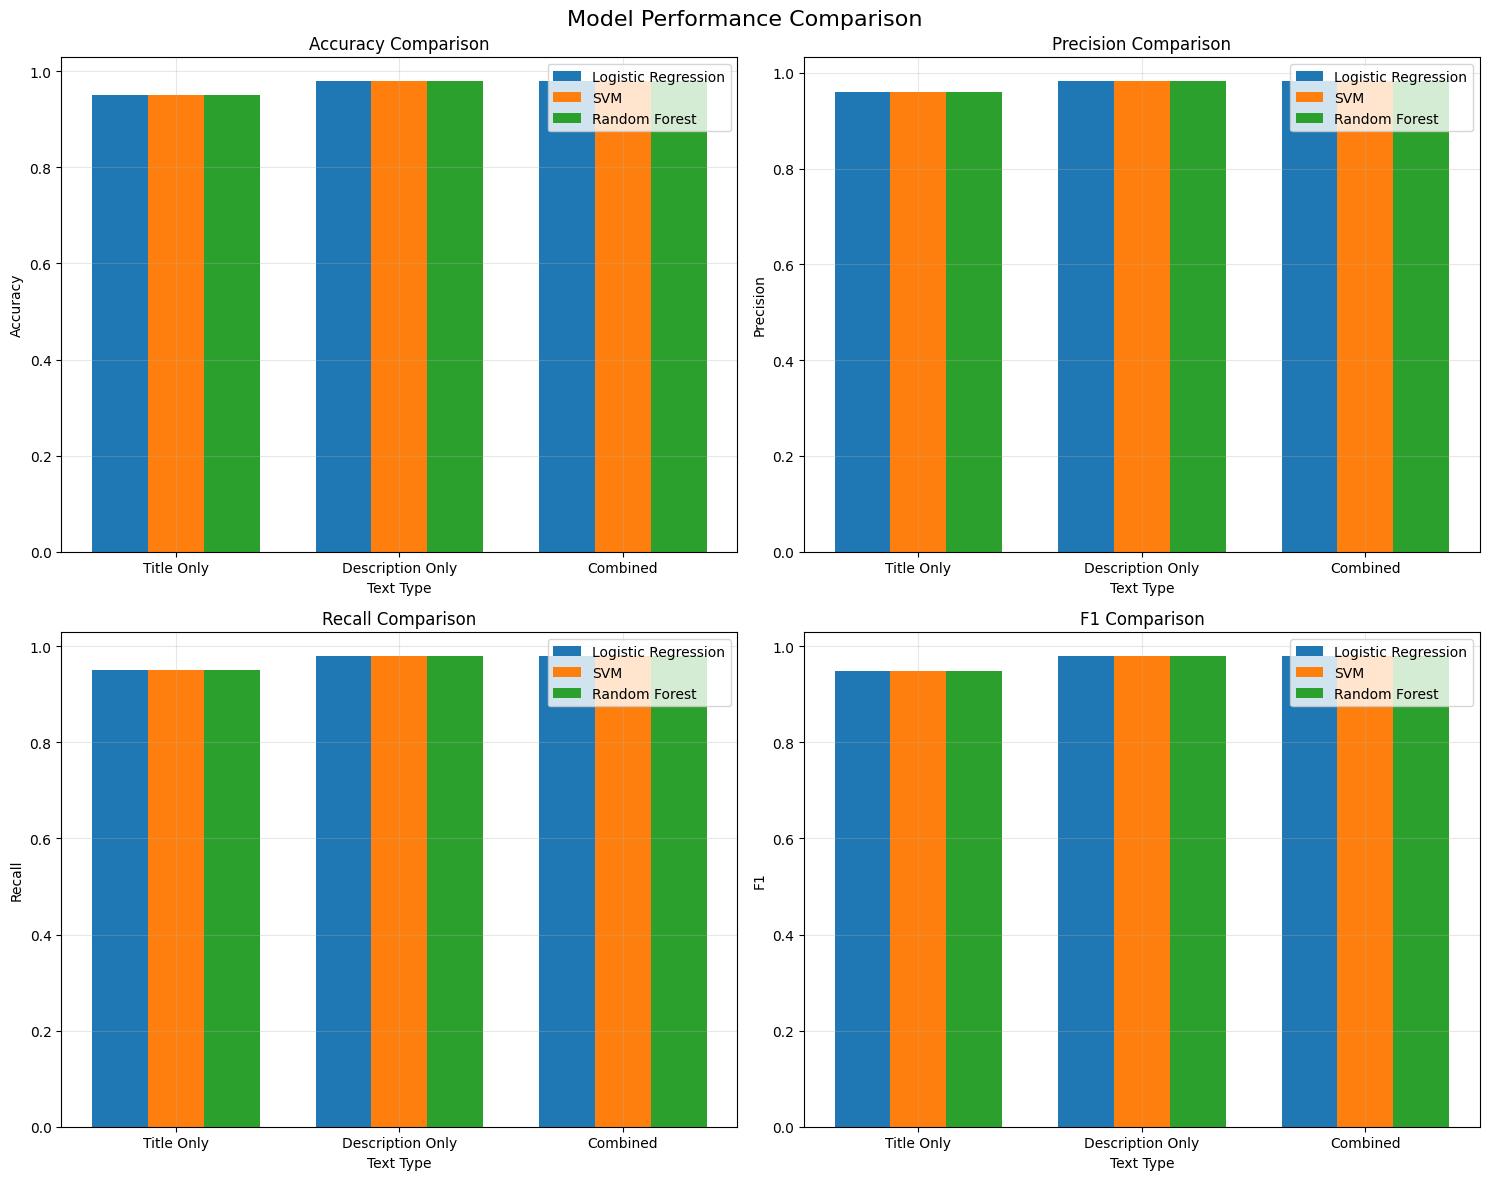

In [10]:
# Create performance comparison charts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Prepare data for plotting
metrics = ['accuracy', 'precision', 'recall', 'f1']
text_types = list(text_combinations.keys())
model_names = list(models.keys())

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    
    # Create data for the metric
    data = []
    for text_type in text_types:
        for model_name in model_names:
            data.append({
                'Text Type': text_type.replace('_', ' ').title(),
                'Model': model_name,
                'Score': results[text_type][model_name][metric]
            })
    
    df_plot = pd.DataFrame(data)
    
    # Create grouped bar chart
    x = np.arange(len(text_types))
    width = 0.25
    
    for j, model_name in enumerate(model_names):
        model_scores = [results[text_type][model_name][metric] for text_type in text_types]
        ax.bar(x + j*width, model_scores, width, label=model_name)
    
    ax.set_xlabel('Text Type')
    ax.set_ylabel(metric.title())
    ax.set_title(f'{metric.title()} Comparison')
    ax.set_xticks(x + width)
    ax.set_xticklabels([t.replace('_', ' ').title() for t in text_types])
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Best performing combination:
Text Type: description_only
Model: Logistic Regression
Accuracy: 0.9800


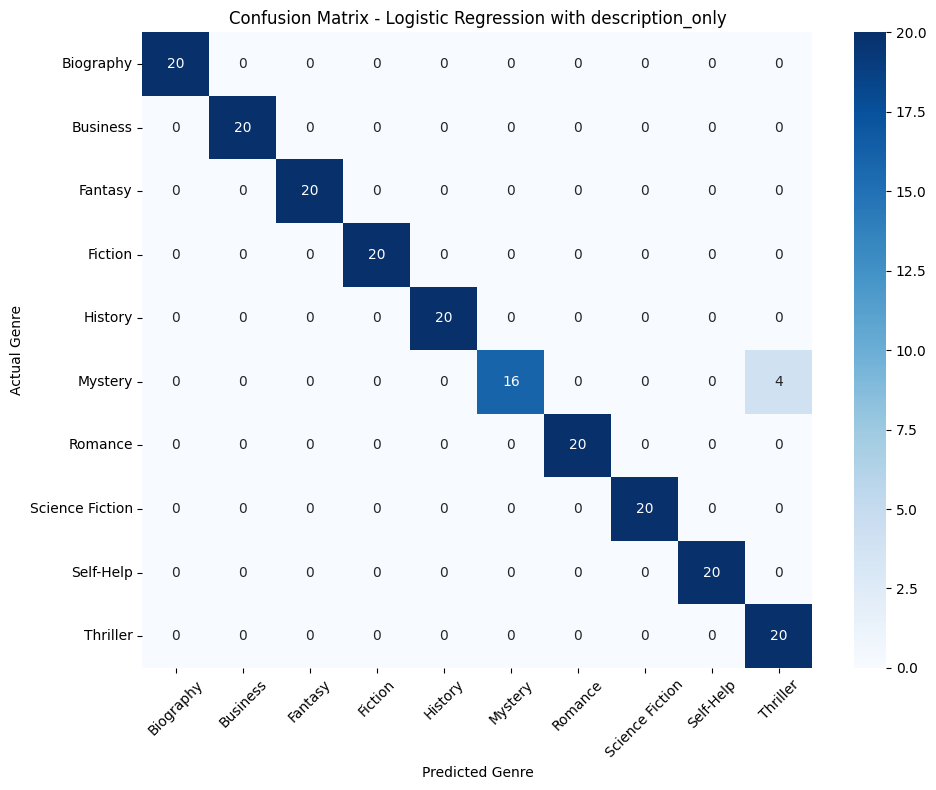

In [11]:
# Find the best performing combination
best_accuracy = 0
best_combination = None
best_model_name = None

for text_type in text_types:
    for model_name in model_names:
        accuracy = results[text_type][model_name]['accuracy']
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = text_type
            best_model_name = model_name

print(f"Best performing combination:")
print(f"Text Type: {best_combination}")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")

# Plot confusion matrix for the best model
best_model_results = results[best_combination][best_model_name]
cm = confusion_matrix(best_model_results['y_test'], best_model_results['y_pred'])

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name} with {best_combination}')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 6. Save Models and Vectorizers


In [12]:
# Retrain the best model on the full dataset
best_text_data = text_combinations[best_combination]
X_full = tfidf_vectorizer.fit_transform(best_text_data)
y_full = df['genre_encoded']

# Train the best model
best_model = models[best_model_name]
best_model.fit(X_full, y_full)

# Save the model and vectorizer
joblib.dump(best_model, 'model.pkl')
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Models saved successfully!")
print(f"Best model: {best_model_name}")
print(f"Text combination: {best_combination}")
print(f"Final accuracy: {best_accuracy:.4f}")


Models saved successfully!
Best model: Logistic Regression
Text combination: description_only
Final accuracy: 0.9800


## 7. Save Cleaned Dataset


In [ ]:
# Save the cleaned dataset
df_cleaned = df[['title', 'description', 'genre', 'cleaned_title', 'cleaned_description', 'combined_text']].copy()
df_cleaned.to_csv('cleaned_book_dataset.csv', index=False)

print("Cleaned dataset saved as 'cleaned_book_dataset.csv'")
print(f"Dataset shape: {df_cleaned.shape}")
df_cleaned.head()


Cleaned dataset saved as 'cleaned_book_dataset.csv'
Dataset shape: (1000, 6)


,title,description,genre,cleaned_title,cleaned_description,combined_text
0,The Great Gatsby,A story of the fabulously wealthy Jay Gatsby a...,Fiction,great gatsby,story fabulously wealthy jay gatsby love daisy...,great gatsby story fabulously wealthy jay gats...
1,The Great Gatsby,A story of the fabulously wealthy Jay Gatsby a...,Fiction,great gatsby,story fabulously wealthy jay gatsby love daisy...,great gatsby story fabulously wealthy jay gats...
2,The Great Gatsby,A compelling fiction novel: A story of the fab...,Fiction,great gatsby,compelling fiction novel story fabulously weal...,great gatsby compelling fiction novel story fa...
3,The Great Gatsby,A story of the fabulously wealthy Jay Gatsby a...,Fiction,great gatsby,story fabulously wealthy jay gatsby love daisy...,great gatsby story fabulously wealthy jay gats...
4,The Great Gatsby,An engaging story: A story of the fabulously w...,Fiction,great gatsby,engaging story story fabulously wealthy jay ga...,great gatsby engaging story story fabulously w...


: 